## Improve Slum Area Identification through Real-Estate Data##

- By: [Kathirvel Kumararaja]()

# Problem Statement

Informal settlements are home to the most socially and economically vulnerable people on the planet. In order to deliver effective economic and social aid, non-government organizations (NGOs), such as the United Nations Children’s Fund (UNICEF), require detailed maps of the locations of informal settlements.
New Light Technologies hired us to predict informal settlements through web-scraping of real-estate data. While original scope of the project was to build a web scraper to house and apartment adverts for a selected city we found that there is no standadization of real estate across Africa/Latin America/Middle East. We limited our scope to Brazil.

The project will attempt to test the feasibility of estimating informal tenure from this information.

We will be using __Accuracy__ as a metric to test the model. 
We will be using a __classification__ model to __predict__ and a __regression__ model to __intrepret__ the findings.  

![title](../assets/ClientProject.jpg)

# Executive Summary

This project is being developed for New Light Technologies  a small, award-winning organization based in Washington, D.C. that provides solutions to government, commercial, and non-profit clients. The main objective of this project is to Improve Slum Area Identification through Real-Estate Data. We found during research that around 25% of the world's urban population lives in informal settlements, areas that are cut off from basic services and city infrastructure. Mapping these locations can dramatically help aid and non-government organizations better serve those in need. Our team intent to develope a machine learning-based tool that can automatically classify informal settlements using freely available population density data, real estate listing, satellite and aerial imagery. Our first strategy is to finalize a good data source forbuild a web scraper to house and apartment adverts for a selected city in Africa/Latin America/Middle East. 
We used Geo processing for extracting the data related to census data from few cities from Barzil (Viz. Sao Paulo). The Geo processing helped us download the census data and real estate adverts in the selected city for about 3 years.  Using gridded population estimates, we calculated the ratio of real estate adverts with population density. We used this ratio as one of the x values for our machine learning models which helped  us with  mapping informal settlements. EDA helped us in choosing the X values those seemed to be having more correlation in identifying the slum area. 

Machines had no problem understanding the real estat data, after the initial EDA.

Source : https://www.habitatireland.ie/2018/01/1-billion-people-live-slums/

# Data Dictionary

|Column Name|Data Type|Description|
|---|---|---|  
cd_geocodi| | Shapefile 
nm_subdist|*object*| Name of the subdistrict.  
nm_distrit|*object*| Name of district.  
nm_municip|*object*| Name of municipality.   
geog_orig_area| *float* | Area of geographical  shapefile.  
favela_present|*boolean*| 1 = Favela Present, 0 = Favela Not Present|  
favela_area_squaremeters| *float*| Area of Favela (m^2)  
sao_paulo_apartment_count_listings| *integer* | Number of listings within shapefile.  
sao_paulo_apartment_near_dist| *float* | Distance to the nearest listing outside of shapefile.
sao_paulo_apartment_near_angle| *float* | Angle to nearest listing outside shapefile. 
sao_paulo_apartment_near_price| *float* |  Price of nearest listing outside of shapefile.
brazil_apartment_count_listings| *integer* | Number of apartment listings within shapefile.
brazil_apartment_near_dist| *float* |Distance to the nearest apartment listing outside of shapefile.
brazil_apartment_near_angle| *float* | Angle to nearest apartment listing outside shapefile.
brazil_apartment_near_price| *float* |  Price of nearest apartment listing outside of shapefile.
brazil_house_count_listings| *integer* |  Number of house listings within shapefile.
brazil_house_near_dist| *float* |  Distance to the nearest house listing outside of shapefile.
brazil_house_near_angle| *float* |  Angle to nearest house listing outside shapefile.
brazil_house_near_price| *float* |  Price of nearest house listing outside of shapefile.
brazil_store_count_listings| *integer* |  Number of store listings within shapefile.
brazil_store_near_dist| *float* |  Distance to the nearest store listing outside of shapefile.
brazil_store_near_angle| *float* |  Angle to nearest store listing outside shapefile.
brazil_store_near_price| *float* |  Price of nearest store listing outside of shapefile.
brazil_ph_count_listings| *integer* |  Number of private home listings within shapefile.
brazil_ph_near_dist| *float* |  Distance to the nearest private home listing outside of shapefile.
brazil_ph_near_angle| *float* |  Angle to nearest private home listing outside shapefile.
brazil_ph_near_price| *float* |  Price of nearest private home listing outside of shapefile.
population_estimate| *float* |  Population Estimate for shapefile. 

# Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



import warnings
warnings.filterwarnings('ignore')

/Users/kraja/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('../datasets/modeling_dataset.csv')

In [3]:
data.head()

,cd_geocodi,nm_subdist,nm_distrit,nm_municip,nm_micro,nm_meso,id1,geog_orig_area,favela_present,favela_area_squaremeters,...,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,sp_brazil_ph_kernel_density,population_estimate,total_listing_count,listing/pop,listing/area
0,350570810000023,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4151,0.225738,0.0,0.0,...,0.0,31,8889.189773,-158.493799,2500.0,0.0,1164.570831,0.0,0.000000,0.000000
1,350570810000025,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4153,0.039267,0.0,0.0,...,0.0,31,8546.979457,-156.899284,2500.0,0.0,413.065460,0.0,0.000000,0.000000
2,350570805000043,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4380,0.039251,0.0,0.0,...,0.0,31,17668.657905,-146.372789,2500.0,0.0,424.170563,0.0,0.000000,0.000000
3,350570805000056,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4393,0.071366,0.0,0.0,...,0.0,31,14395.394220,-159.666627,2500.0,0.0,272.054306,3.0,1.102721,4203.667989
4,350570805000057,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4394,1.264789,0.0,0.0,...,0.0,31,13056.248015,-160.753356,2500.0,0.0,2401.068539,6.0,0.249889,474.387541


In [4]:
data.shape

(27817, 44)

__Preprocessing & Modeling__

In [5]:
X_cols = ['sao_paulo_apartment_count_listings', 'sao_paulo_apartment_near_dist', 'sao_paulo_apartment_near_angle',
         'sao_paulo_apartment_near_price', 'brazil_apartment_count_listings', 'brazil_apartment_near_dist', 
         'brazil_apartment_near_angle', 'brazil_apartment_near_price', 'brazil_house_count_listings', 
         'brazil_house_near_dist', 'brazil_house_near_angle', 'brazil_house_near_price', 
         'brazil_store_count_listings', 'brazil_store_near_dist', 'brazil_store_near_angle',
         'brazil_store_near_price', 'brazil_ph_count_listings', 'brazil_ph_near_dist', 'brazil_ph_near_angle',
         'brazil_ph_near_price', 'population_estimate']

X = data[X_cols]
y = data['favela_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

# Modeling

## Base Line Model

In [6]:
data['favela_present'].value_counts(normalize = True)

0.0    0.778589
1.0    0.221411
Name: favela_present, dtype: float64

## Logistic Regression Model

In [7]:
pipe_log = Pipeline([('sc', StandardScaler()),
                ('log', LogisticRegression(solver = 'liblinear'))
])
params_log = {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                 'log__C': [1e9, 0.0001, 10]}
            
gs_log = GridSearchCV(pipe_log, 
                     params_log,
                 cv=5, 
)

log_model = gs_log.fit(X_train, y_train)

print(f'Score on training set: {log_model.score(X_train, y_train)}')
print(f'Score on testing set: {log_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(log_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.7822835777969513
Score on testing set: 0.785765636232926
Cross Val Score: 0.7814685922386827


__Logistic Regression Score Intrepretation__

**The above Logistic Regression model has accuracy of 0.78 for my training set and has accuracy 0.79 for my testing set. This model performs same as my baseline model score of 0.77**

## KNN Model

In [8]:
pipe_kn1 = Pipeline([('sc', StandardScaler()),
    ('kn', KNeighborsClassifier())
])
params_kn1 = {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                 'kn__p': [1, 2], 
                 'kn__weights': ['uniform', 'distance'],
                 'kn__n_neighbors': [3, 5, 10]}
                 
gs_kn1 = GridSearchCV(pipe_kn1, 
                     params_kn1,
                 cv=5, 
)

kn1_model = gs_kn1.fit(X_train, y_train)
print(f'Score on training set: {kn1_model.score(X_train, y_train)}')
print(f'Score on testing set: {kn1_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(kn1_model, X_train, y_train, cv=5).mean()}')

Score on training set: 1.0
Score on testing set: 0.8825305535585909
Cross Val Score: 0.872639464246458


__KNN Model Score Intrepretation__

**The above KNN model has accuracy of 0.10 for my training set and has accuracy 0.88 for my testing set. This model out performedmy baseline model score of 0.77**

## Decision Tree Model

In [9]:
pipe_dt1 = Pipeline([('sc', StandardScaler()),
    ('dt',DecisionTreeClassifier(random_state = 42))
])
params_dt1 = {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                 'dt__max_depth':[3,5,7],
                 'dt__min_samples_split':[10,15,20],
                 'dt__min_samples_leaf':[5,7,9]
                   }
                 
gs_dt1 = GridSearchCV(pipe_dt1, 
                     params_dt1,
                 cv=5, 
)



dt1_model = gs_dt1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {dt1_model.score(X_train, y_train)}')
print(f'Score on testing set: {dt1_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(dt1_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.8217332949860991
Score on testing set: 0.8076204169662113
Cross Val Score: 0.8046208184726418


__Intrepretation Decision Tree Score__

**The above Decision Tree model has accuracy of 0.1 for my training set and has accuracy 0.84 for my testing set. This model out performedmy baseline model score of 0.77**

## Bagged Tree Model

In [10]:
pipe_bag1 = Pipeline([('sc', StandardScaler()),
    ('bag',BaggingClassifier(random_state = 42))
])
params_bag1 = {'sc__with_mean': [True, False], 
              'sc__with_std': [True, False],
              'bag__n_estimators': [10, 20, 30],
              'bag__max_samples': [1, 2, 3],
              'bag__bootstrap': [True],
                   }
                 
gs_bag1 = GridSearchCV(pipe_bag1, 
                     params_bag1,
                 cv=5, 
)



bag1_model = gs_bag1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {bag1_model.score(X_train, y_train)}')
print(f'Score on testing set: {bag1_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(bag1_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.7786405905474068
Score on testing set: 0.7784327821710999
Cross Val Score: 0.7786406030896732


__Intrepretation Bagged Tree Score__

**The above Bagged Tree model has accuracy of 0.78 for my training set and has accuracy 0.78 for my testing set. This model out performedmy baseline model score of 0.77**

## Random Forest

__Special Note : Since the cross val score was very different from Test and Train scores I am trying with a different random state.__

In [11]:
X_cols = ['sao_paulo_apartment_count_listings', 'sao_paulo_apartment_near_dist', 'sao_paulo_apartment_near_angle',
         'sao_paulo_apartment_near_price', 'brazil_apartment_count_listings', 'brazil_apartment_near_dist', 
         'brazil_apartment_near_angle', 'brazil_apartment_near_price', 'brazil_house_count_listings', 
         'brazil_house_near_dist', 'brazil_house_near_angle', 'brazil_house_near_price', 
         'brazil_store_count_listings', 'brazil_store_near_dist', 'brazil_store_near_angle',
         'brazil_store_near_price', 'brazil_ph_count_listings', 'brazil_ph_near_dist', 'brazil_ph_near_angle',
         'brazil_ph_near_price', 'population_estimate']

X = data[X_cols]
y = data['favela_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
pipe_rf1 = Pipeline([('sc', StandardScaler()),
        ('rf',RandomForestClassifier())
])
params_rf1= {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                  'rf__n_estimators': [100, 150, 200],
            'rf__max_depth': [None, 1, 2, 3, 4, 5], }
                 
gs_rf1 = GridSearchCV(pipe_rf1, 
                     params_rf1,
                 cv=5, )




rf1_model = gs_rf1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {rf1_model.score(X_train, y_train)}')
print(f'Score on testing set: {rf1_model.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.8921639108554996


In [13]:
print(f'Cross Val Score: {cross_val_score(rf1_model, X_train, y_train, cv=3).mean()}')

Cross Val Score: 0.8831841847595393


## Extra trees model

In [14]:
pipe_et1 = Pipeline([('sc', StandardScaler()),
        ('et',ExtraTreesClassifier())
])
params_et1= {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                  'et__n_estimators': [100, 150, 200],
            'et__max_depth': [None, 1, 2, 3, 4, 5], }
                 
gs_et1 = GridSearchCV(pipe_et1,
                        param_grid=params_et1,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-2)



et1_model = gs_et1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {et1_model.score(X_train, y_train)}')
print(f'Score on testing set: {et1_model.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.8925952552120776


In [15]:
pipe = Pipeline(steps=[('extra_trees', ExtraTreesClassifier())])

params = {'extra_trees__n_estimators': [300, 400, 500, 600]}
gs_extra_trees = GridSearchCV(pipe,
                              param_grid=params,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-2)
gs_extra_trees.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('extra_trees',
                                        ExtraTreesClassifier(bootstrap=False,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                 

In [16]:
# Evaluate model.
print(f'Score on training set: {gs_extra_trees.score(X_train, y_train)}')
print(f'Score on testing set: {gs_extra_trees.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.8927390366642703


In [17]:
# Best Estimator for GridSearch
gs_extra_trees.best_estimator_

Pipeline(memory=None,
         steps=[('extra_trees',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=500, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [18]:
print(f'Cross Val Score: {cross_val_score(et1_model, X_train, y_train, cv=5).mean()}')

Cross Val Score: 0.8887445521924604


__Intrepretation Extra Trees Score__

**The above Extra Tree model has accuracy of 0.9 for my training set and has accuracy 0.94 for my testing set. This model out performedmy baseline model score of 0.77**

## AdaBoost Model

In [19]:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(X_train, y_train)
ada.score(X_train, y_train)

# Evaluate model.
print(f'Score on training set: {ada.score(X_train, y_train)}')
print(f'Score on testing set: {ada.score(X_test, y_test)}')
#print(f'Cross Val Score: {cross_val_score(ada, X, y, cv=5).mean()}')

Score on training set: 0.8310804333237465
Score on testing set: 0.8253055355859095


__Intrepretation of AdaBoost Model__

This model is worse than most of the previous models, the Extra Trees model is still the best option for the moment. Let's try moving on to a Voting Classifier to see how well it performs.

## Gradient Boost Model

In [20]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
grad_boost.score(X_train, y_train)

# Evaluate model.
print(f'Score on training set: {grad_boost.score(X_train, y_train)}')
print(f'Score on testing set: {grad_boost.score(X_test, y_test)}')
#print(f'Cross Val Score: {cross_val_score(grad_boost, X, y, cv=5).mean()}')

Score on training set: 0.8464193270060397
Score on testing set: 0.8312005751258088


__Intrepretation of Gradient Boost Model__

This model is slightly better than the AdaBoost model, but still not as good as the Extra Trees model. Let's try a Voting Classifier with the best performing models next.

## Voting Classifier Model

In [21]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])



vote = VotingClassifier([
    ('x_tree', ExtraTreesClassifier()),
    ('rand_forest', RandomForestClassifier()),
    ('knn_pipe', knn_pipe),
], voting = 'soft')
vote_params = {
    'x_tree__max_depth': [None, 4],
    'rand_forest__max_depth': [3, 4],
    'knn_pipe__knn__n_neighbors': [3, 5, 7],

}
gs_vc = GridSearchCV(vote, 
                     param_grid = vote_params, 
                     cv = 5,
                     n_jobs = -2,
                     scoring = 'accuracy')
gs_vc.fit(X_train, y_train)
print(gs_vc.best_score_) # cross val score
gs_vc.best_params_

# Evaluate model.
print(f'Score on training set: {gs_vc.score(X_train, y_train)}')
print(f'Score on testing set: {gs_vc.score(X_test, y_test)}')
#print(f'Cross Val Score: {cross_val_score(gs_vc, X, y, cv=5).mean()}')


0.8782954654395552
Score on training set: 0.9954941999808263
Score on testing set: 0.8783608914450036


# Model Selection and Evaluation 

**Model performance at a glance :**

**Baseline score = 0.78**

| Sl. No     | Classifier | Train Score | Test Score |
|------------|------------|-------------|------------|
|  1         | LogisticReg| 0.78        | 0.79       |
|  2         | Bgd Trees  | 0.78        | 0.77       |
|  3         | Rnd. Frst  | 1.00        | 0.90       |
|  4         | Extra Tree | 1.00        | 0.90       |
|  5         | Ada Boost  | 0.83        | 0.82       |
|  6         | Gradnt.Bst.| 0.84        | 0.83       |
|  5         | Votingclsfr| 0.99        | 0.87       |

Extra trees model produced 0.90 accuracy score - better than other machine models.

## Testing Accuracy Score

In [22]:
# Accuracy score for Extra Trees Model

print(f'Score on training set: {et1_model.score(X_train, y_train)}')
print(f'Score on testing set: {et1_model.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.8925952552120776


## Confusion Matrix

**Building confusion Matrix for my best performing Extra Trees model**

In [23]:
def c_confusion_matrix(y_true, y_pred):
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = y_true.unique()
    labels.sort()
    
    # plotting
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
    
   
    
    sns.heatmap(cm, annot=True, fmt='g', cmap="BuPu",xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Informal Settlements')
    plt.ylabel('True Informal Settlements')
    
    b, t = plt.ylim()
    b += 0.8
    t -= 0.8
    plt.ylim(b, t)
    

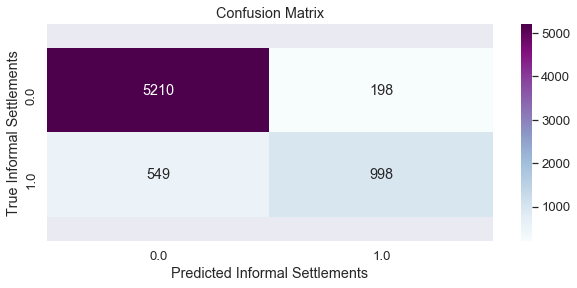

In [24]:
preds = et1_model.predict(X_test)
c_confusion_matrix(y_test, preds)

 - The "1" which is 'Informal Settlment' category is predicted correctly => True positive score = 1015
 - The "1" which is 'Informal Settlment' category is predicted incorrectly => False positive = 526
 - The "0" which is 'Formal Settlment' category is predicted correctly => True negative = 5193
 - The "0" which is 'Formal Settlment' is predicted incorrectly => False positive = 221

## ROC AUC Curve

Receiver Operating Characteristic (ROC) Curve & Area under the ROC curve

I am using Receiver Operating Characteristic curve to visualize the overlap between my positive class and negative class by moving our classification threshold from 0 to 1.

I am using the area under the ROC curve (abbreviated ROC AUC or AUC ROC) to quantify the gap between our distributions.

In [25]:
pred_proba = [i[1] for i in et1_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9375398031310841

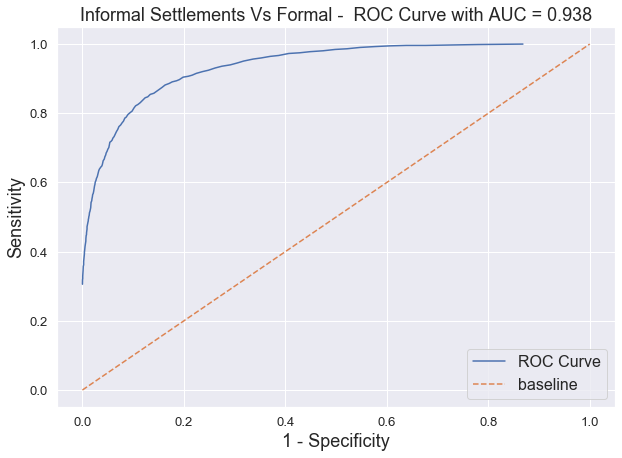

In [27]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Informal Settlements Vs Formal -  ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=18)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

__Interpreting ROC AUC__

**We have an ROC AUC of close to 1.In otherwords in our Logistics Regression model our Informal Settlement (positive) and Formal housings (negative) populations are 95% perfectly separated. Looking at our model we can conclude that our model is very close to as good as it can get.**

## Feature Importance

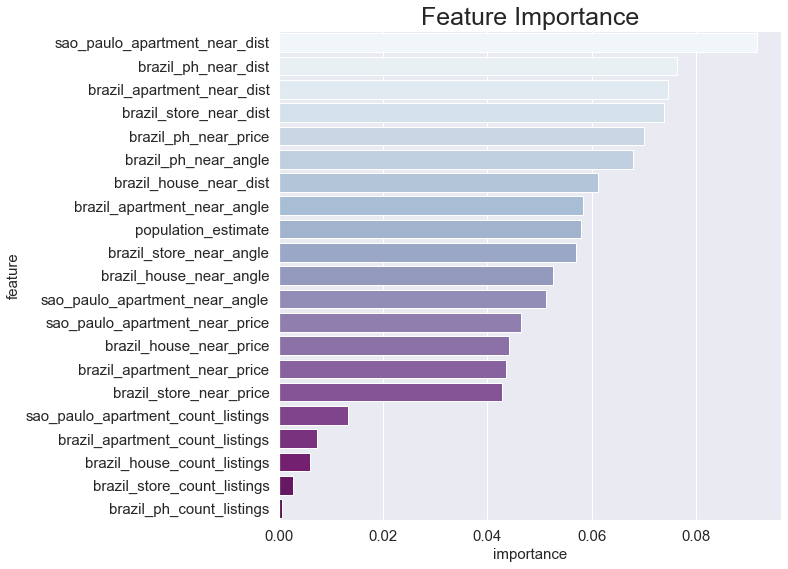

In [28]:
# getting the feature importances crom the model
feats = gs_extra_trees.best_estimator_.steps[0][1].feature_importances_
# getting keys of the test set
keys = X_test.keys()
# zipping the keys and feature importances
feat_import = pd.DataFrame(list(zip(keys, feats)),
                           columns=['feature', 'importance'])
# sorting the dataframe by importance
feat_import = feat_import.sort_values(by='importance', ascending=False)

# plotting importance
plt.figure(figsize=(9, 9))
plt.title('Feature Importance', fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=feat_import,
            x='importance',
            y='feature',
            orient='h',
            palette="BuPu")
plt.xlabel('importance', fontsize=15)
plt.ylabel('feature', fontsize=15)
plt.tick_params(labelsize=15)

## Model Coeficients

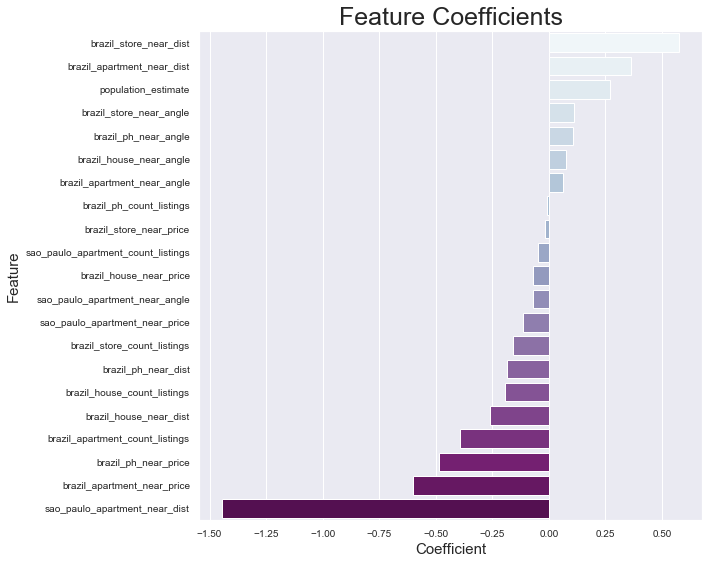

In [29]:
# getting the feature coefficiants crom the Logistic Regression model
coefs = gs_log.best_estimator_.steps[1][1].coef_
# getting keys of the test set
keys = X_test.keys()
# zipping the keys and feature importances
feat_coef = pd.DataFrame(list(zip(keys, coefs[0])),
                         columns=['feature', 'coefficient'])
# sorting the dataframe by coefficients
feat_coef = feat_coef.sort_values(by='coefficient', ascending=False)

# plotting coefficients
plt.figure(figsize=(9, 9))
plt.title('Feature Coefficients', fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=feat_coef,
            x='coefficient',
            y='feature',
            orient='h',
            palette="BuPu")
plt.xlabel('Coefficient', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.tick_params(labelsize=10)

## Visualizing rhe 

In [31]:
# getting predictions and saving them to a csv for mapping
preds = gs_extra_trees.predict(X)
data['predicted_favela_present'] = preds
map_df = data[['cd_geocodi', 'favela_present', 'predicted_favela_present']]
map_df.to_csv('../datasets/predicted-favelas.csv', index=False)

## Conclusion

With help of availabel data from Kaggle, public real estate data and population mapped to cesnsus tracts I was able to predict informal settlements in Sao Paulo. During the modeling process we found that few features have high (Positive and Negative) coffecients with the presence of a informal settlements. __Apartment listing distance__ was a great indicator in our models. One of the __unusual findings__ is that the __price__ of real estate listings and __quantity__ of the listings didn't have much impact.

One of the limitation I found in our best performing model the Extra Tree Modelis that the Train and Test scores always performed much better than the cross val score on the original dataset. Even after trying with different Random State I couldn't improve the Cross Val scores on the Original data set. This needs further investigation. 

This model with data from public real estate data and population mapped to cesnsus tracts can be used in other cities if we can get an accurate data from the respective agencies. The model would be best fit for North and South American countries.  

### Recommendations and furthur plans

As noted in the conclusion, we recommend using different models for different regions. While this model works well for the city we tested in on, it may not work well in less urban environments where informal settlements may be constructed.

This method isn't perfect, and will likely work best when used in conjunction with other methods of detecting informal settlements using satellite data. A combination of the two would likely yield better results than these models alone.

One limitation is that very small favelas will mark an entire census tract as having an informal settlement within it. Future iterations may want to limit the number of small informal settlements included in the model.

Future versions may also want to avoid using census tracts as a geographical unit as they tend to have unusual shapes. Other methods should be considered for geographical mapping.